## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 之前做過的處理

In [2]:
# 設定 data_path
dir_data = r'C:\Users\user\Desktop\GitHub\ML100-Days\domcuments\homework\D13'
f_app_train = os.path.join(dir_data, 'application_train.csv')
f_app_test = os.path.join(dir_data, 'application_test.csv')

app_train = pd.read_csv(f_app_train)
app_test = pd.read_csv(f_app_test)

from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
# also apply to testing dataset
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

# absolute the value of DAYS_BIRTH
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_test['DAYS_BIRTH'] = abs(app_test['DAYS_BIRTH'])


In [3]:
INCOME = app_train[['TARGET', 'AMT_INCOME_TOTAL']].copy()

train_n =  len(app_train['AMT_INCOME_TOTAL'])
train_mean = app_train['AMT_INCOME_TOTAL'].mean()
train_max = app_train['AMT_INCOME_TOTAL'].max()
train_min =  app_train['AMT_INCOME_TOTAL'].min()
T_E =  (train_max - train_min) / train_n
INCOME['AMT_INCOME_TOTAL'].describe([.10,.20,.30,.40,.50,.60,.70,.80,.90,.95,.99]).astype(int)

count       307511
mean        168797
std         237123
min          25650
10%          81000
20%          99000
30%         112500
40%         135000
50%         147150
60%         162000
70%         180000
80%         225000
90%         270000
95%         337500
99%         472500
max      117000000
Name: AMT_INCOME_TOTAL, dtype: int32

{'whiskers': [<matplotlib.lines.Line2D at 0xc206518f60>,
 'caps': [<matplotlib.lines.Line2D at 0xc206ab7f98>,
 'boxes': [<matplotlib.lines.Line2D at 0xc206ab7550>],
 'medians': [<matplotlib.lines.Line2D at 0xc206ac8b70>],
 'fliers': [<matplotlib.lines.Line2D at 0xc206ac8f98>],
 'means': []}

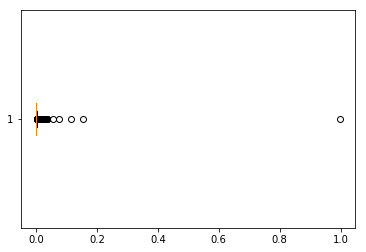

In [4]:

train_scale = (INCOME['AMT_INCOME_TOTAL'] - train_mean) / train_n
train_scale2 = train_scale / T_E
plt.boxplot(x= train_scale2, vert = False, )

In [5]:
# list_cut_income = [0, 112500, 147150, 202500, 117000000]
list_cut_income = sorted(list(np.linspace(472500, train_min,num=10,dtype=int,))) #99% data
INCOME['INCOME_eq'] = pd.cut(INCOME['AMT_INCOME_TOTAL'], list_cut_income, include_lowest= True)
train_delmax = INCOME['INCOME_eq'].value_counts(sort = False)
INCOME['INCOME_eq'].value_counts(sort = False)

(25649.999, 75300.0]    23918
(75300.0, 124950.0]     83480
(124950.0, 174600.0]    82548
(174600.0, 224250.0]    49745
(224250.0, 273900.0]    40671
(273900.0, 323550.0]    11015
(323550.0, 373200.0]     6745
(373200.0, 422850.0]     3113
(422850.0, 472500.0]     3262
Name: INCOME_eq, dtype: int64

In [ ]:
INCOME_grouped = INCOME.groupby('INCOME_eq').mean()
# INCOME.plot(kind = 'bar', x ='AMT_INCOME_TOTAL', y ='TARGET', figsize = (8,8) )

{'whiskers': [<matplotlib.lines.Line2D at 0xc206b4af60>,
 'caps': [<matplotlib.lines.Line2D at 0xc206b4f7f0>,
 'boxes': [<matplotlib.lines.Line2D at 0xc206b4a9e8>],
 'medians': [<matplotlib.lines.Line2D at 0xc206b4fcf8>],
 'fliers': [<matplotlib.lines.Line2D at 0xc206b578d0>],
 'means': [<matplotlib.lines.Line2D at 0xc206b574a8>]}

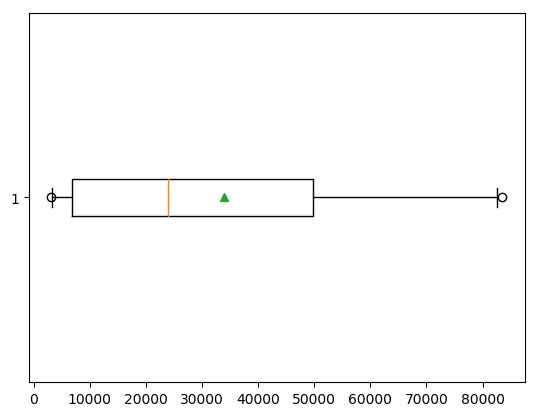

In [6]:
plt.style.use('default')
plt.boxplot(x = train_delmax, vert = False, whis=[5,95], widths = 0.1, showmeans = True)

In [143]:
# app_train["DAYS_BIRTH"]/365
app_train["AGE"] = round(app_train["DAYS_BIRTH"]/365)
app_train["AGE"].value_counts(sort = True)
#以最大最小值作為區間等分10
cut_list = [1,39,42,45,48,51,54,57,60,66,69]
app_train["AGE_GROUP"] = pd.cut(app_train["AGE"], cut_list, include_lowest= True )
app_train["AGE_GROUP"].value_counts()

(0.999, 39.0]    123037
(60.0, 66.0]      28606
(39.0, 42.0]      25405
(42.0, 45.0]      23782
(45.0, 48.0]      21442
(51.0, 54.0]      21353
(54.0, 57.0]      20723
(48.0, 51.0]      19899
(57.0, 60.0]      19462
(66.0, 69.0]       3802
Name: AGE_GROUP, dtype: int64

In [11]:
app_train["BIRTHDAY_scatter"] = pd.cut(app_train["DAYS_BIRTH"].values/365, 10)

In [12]:
app_train["BIRTHDAY_scatter"].value_counts()

(35.099, 39.959]    41758
(39.959, 44.819]    40350
(30.238, 35.099]    38430
(44.819, 49.679]    34311
(49.679, 54.54]     33544
(25.378, 30.238]    33127
(54.54, 59.4]       32650
(59.4, 64.26]       27685
(20.469, 25.378]    13679
(64.26, 69.121]     11977
Name: BIRTHDAY_scatter, dtype: int64

In [135]:
app_train['INCOME_eq'].index

RangeIndex(start=0, stop=307511, step=1)